**Cell 1: Import libraries and define initial variables**

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Given input activation
A1 = np.array([[0.10]])

# Initialize weights and biases for 4 hidden layers + output layer (5 layers total)
W1 = np.array([[0.20]])  # Input to Hidden1
b1 = np.array([[0.0]])

W2 = np.array([[0.30]])  # Hidden1 to Hidden2
b2 = np.array([[0.0]])

W3 = np.array([[0.40]])  # Hidden2 to Hidden3
b3 = np.array([[0.0]])

W4 = np.array([[0.50]])  # Hidden3 to Output
b4 = np.array([[0.0]])

# Target output
R = np.array([[0.01]])

# Learning rate
alpha = 0.5


**Cell 2: Define sigmoid function and its derivative**

In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)


**Cell 3: Set parameters for training and initialize error storage**

In [24]:
epochs = 2
errors = np.zeros(epochs)


**Cell 4: Training loop (forward pass, backpropagation, weight updates)**

In [26]:
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}:")

    # Forward pass
    Z1 = np.dot(W1, A1) + b1
    A2 = sigmoid(Z1)

    Z2 = np.dot(W2, A2) + b2
    A3 = sigmoid(Z2)

    Z3 = np.dot(W3, A3) + b3
    A4 = sigmoid(Z3)

    Z4 = np.dot(W4, A4) + b4
    A5 = sigmoid(Z4)

    print(f"Z1: {Z1}, A2: {A2}")
    print(f"Z2: {Z2}, A3: {A3}")
    print(f"Z3: {Z3}, A4: {A4}")
    print(f"Z4: {Z4}, A5: {A5}")

    # Backpropagation
    D4 = (A5 - R) * sigmoid_derivative(Z4)
    D3 = np.dot(W4.T, D4) * sigmoid_derivative(Z3)
    D2 = np.dot(W3.T, D3) * sigmoid_derivative(Z2)
    D1 = np.dot(W2.T, D2) * sigmoid_derivative(Z1)

    print(f"D4: {D4}")
    print(f"D3: {D3}")
    print(f"D2: {D2}")
    print(f"D1: {D1}")

    # Gradients
    grad_W4 = np.dot(D4, A4.T)
    grad_b4 = D4

    grad_W3 = np.dot(D3, A3.T)
    grad_b3 = D3

    grad_W2 = np.dot(D2, A2.T)
    grad_b2 = D2

    grad_W1 = np.dot(D1, A1.T)
    grad_b1 = D1

    # Update weights and biases
    W4 -= alpha * grad_W4
    b4 -= alpha * grad_b4

    W3 -= alpha * grad_W3
    b3 -= alpha * grad_b3

    W2 -= alpha * grad_W2
    b2 -= alpha * grad_b2

    W1 -= alpha * grad_W1
    b1 -= alpha * grad_b1

    # Store error
    total_error = np.sum((A5 - R)**2)
    errors[epoch] = total_error
    print(f"Total Error: {total_error}")



Epoch 1:
Z1: [[0.01987973]], A2: [[0.50496977]]
Z2: [[0.14949687]], A3: [[0.53730477]]
Z3: [[0.1942144]], A4: [[0.54840156]]
Z4: [[0.09832539]], A5: [[0.52456156]]
D4: [[0.12832997]]
D3: [[0.01352166]]
D2: [[0.0013156]]
D1: [[9.83964317e-05]]
Total Error: 0.2647736026127926

Epoch 2:
Z1: [[0.01983004]], A2: [[0.50495735]]
Z2: [[0.14866763]], A3: [[0.5370986]]
Z3: [[0.1854218]], A4: [[0.54622309]]
Z4: [[0.01401298]], A5: [[0.50350319]]
D4: [[0.12336974]]
D3: [[0.01193383]]
D2: [[0.0011504]]
D1: [[8.59455955e-05]]
Total Error: 0.24354539639694467


**Cell 5: Plot the total errors**

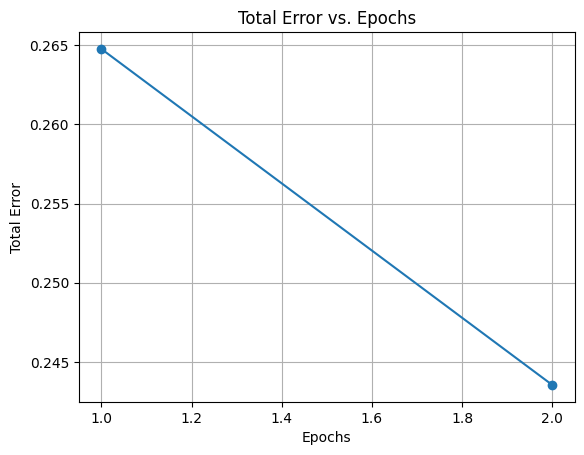

In [27]:
plt.figure()
plt.plot(range(1, epochs + 1), errors, '-o')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Total Error vs. Epochs')
plt.grid(True)
plt.show()
